In [46]:

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import subprocess
import sys
sys.path.append('training/')
sys.path.append('../')
sys.path.append('preprocessing/')
from layers import nms,iou

%matplotlib inline


CLUSTER_PATH = Path('/cluster/project2/SUMMIT/cache/sota/grt123/luna/prep_results')
PREP_RESULT_PATH = Path('/home/jmccabe/Projects/SOTAEvaluationNoduleDetection/models/grt123/prep_result')

In [52]:
def load_processed_image(scan_id, prep_result_path, cluster_path):

    scan_file_name = f'{scan_id}_clean.npy'
    image_path = f'{prep_result_path}/{scan_file_name}'
    

    if not Path(image_path).exists():

        subprocess.run([
            f'scp',
            f'jmccabe@little:{cluster_path}/{scan_file_name}',
            image_path
        ])
    else:
        print(f'File {scan_file_name} already exists')    

    return np.load(image_path)

def load_processed_label(scan_id, prep_result_path, cluster_path):

    scan_file_name = f'{scan_id}_label.npy'
    label_path = f'{prep_result_path}/{scan_file_name}'
    

    if not Path(label_path).exists():

        subprocess.run([
            f'scp',
            f'jmccabe@little:{cluster_path}/{scan_file_name}',
            label_path
        ])
    else:
        print(f'File {scan_file_name} already exists')    

    return np.load(label_path)

def display_nodules(image, labels):

    image = np.squeeze(image)
    fig, ax = plt.subplots(len(labels), 1, figsize=(7, 7))
    for idx, label in enumerate(labels):

        if len(labels) == 1:
            a = ax
        else:
            a = ax[idx]
        a.imshow(image[int(label[0]), :, :])
        a.add_patch(patches.Circle((label[2], label[1]), label[3], fill=False, color='b', linewidth=2))

    plt.show()

File 1.3.6.1.4.1.14519.5.2.1.6279.6001.111258527162678142285870245028_clean.npy already exists
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.111258527162678142285870245028_label.npy already exists


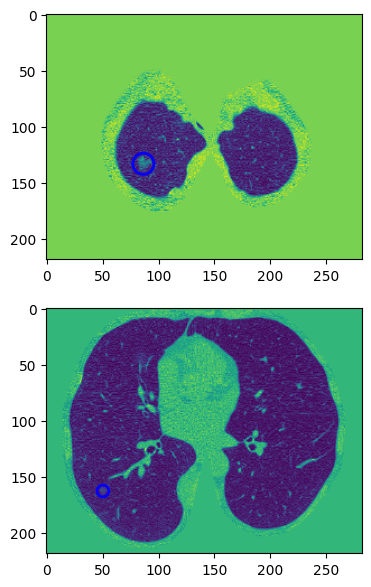

File 1.3.6.1.4.1.14519.5.2.1.6279.6001.203425588524695836343069893813_clean.npy already exists
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.203425588524695836343069893813_label.npy already exists
No nodules found in scan 1.3.6.1.4.1.14519.5.2.1.6279.6001.203425588524695836343069893813
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249_clean.npy already exists
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249_label.npy already exists


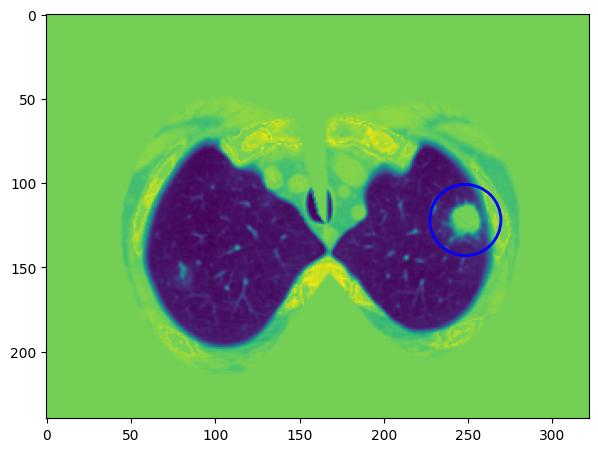

File 1.3.6.1.4.1.14519.5.2.1.6279.6001.339546614783708685476232944897_clean.npy already exists
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.339546614783708685476232944897_label.npy already exists


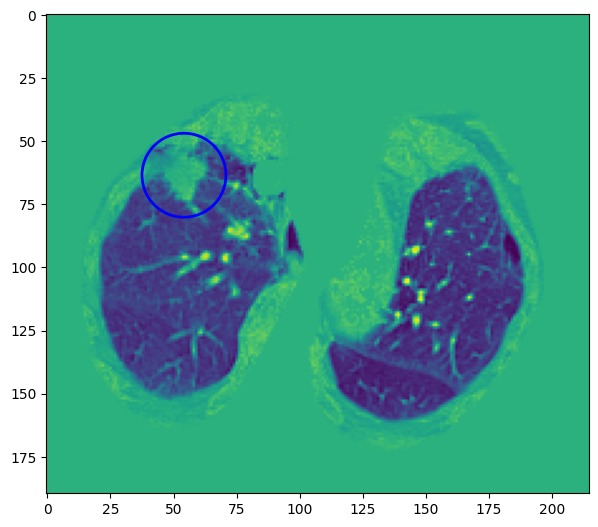

File 1.3.6.1.4.1.14519.5.2.1.6279.6001.193808128386712859512130599234_clean.npy already exists
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.193808128386712859512130599234_label.npy already exists


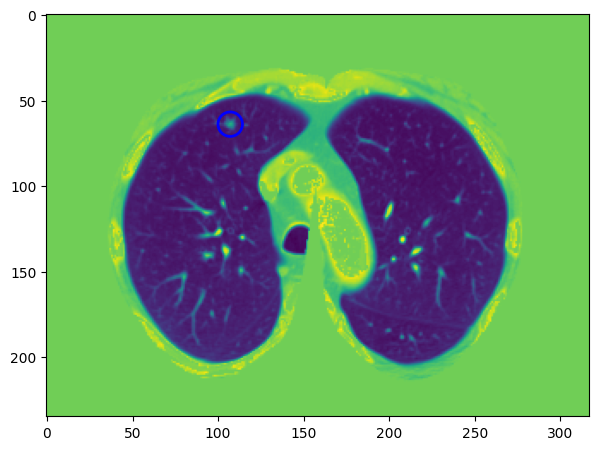

In [53]:
# Double check that the locations are working as expected
scan_ids = [
    scan_path.stem.split('_clean')[0]
    for idx, scan_path in enumerate(Path(PREP_RESULT_PATH).glob('*_clean.npy'))
    if idx < 5
]

for scan_id in scan_ids:

    image = load_processed_image(scan_id, PREP_RESULT_PATH, CLUSTER_PATH)
    label = load_processed_label(scan_id, PREP_RESULT_PATH, CLUSTER_PATH)

    if np.equal(label, 0).sum() != 4:
        display_nodules(image, label)
    else:
        print(f'No nodules found in scan {scan_id}')

File 1.3.6.1.4.1.14519.5.2.1.6279.6001.964952370561266624992539111877_clean.npy already exists
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.964952370561266624992539111877_label.npy already exists


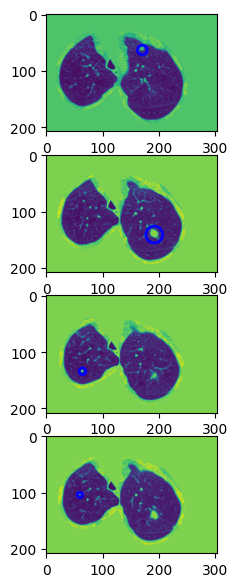

File 1.3.6.1.4.1.14519.5.2.1.6279.6001.219349715895470349269596532320_clean.npy already exists
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.219349715895470349269596532320_label.npy already exists


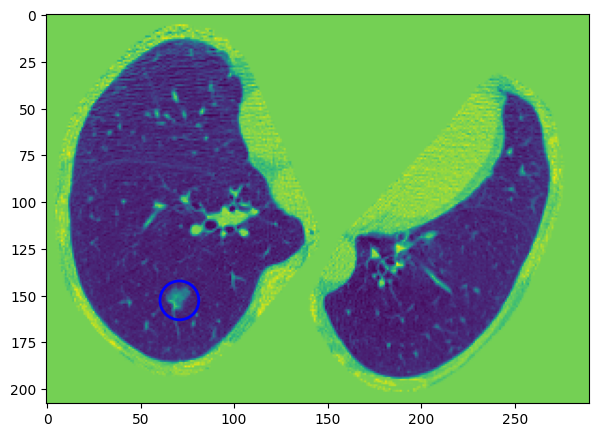

File 1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311_clean.npy already exists
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311_label.npy already exists


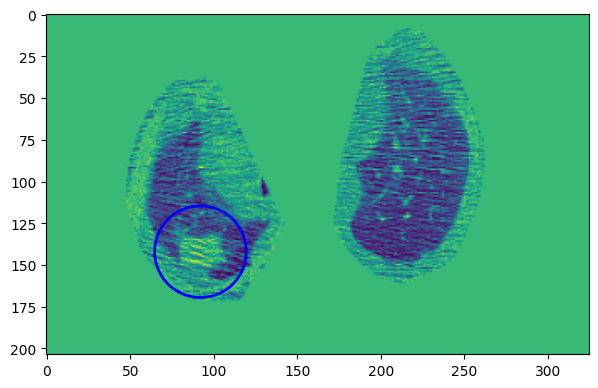

File 1.3.6.1.4.1.14519.5.2.1.6279.6001.312127933722985204808706697221_clean.npy already exists
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.312127933722985204808706697221_label.npy already exists


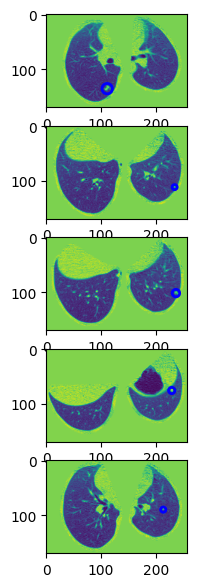

File 1.3.6.1.4.1.14519.5.2.1.6279.6001.282512043257574309474415322775_clean.npy already exists
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.282512043257574309474415322775_label.npy already exists


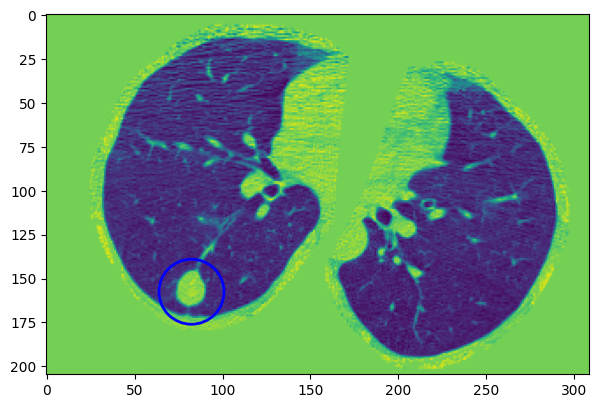

File 1.3.6.1.4.1.14519.5.2.1.6279.6001.414288023902112119945238126594_clean.npy already exists
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.414288023902112119945238126594_label.npy already exists
No nodules found in scan 1.3.6.1.4.1.14519.5.2.1.6279.6001.414288023902112119945238126594
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.123697637451437522065941162930_clean.npy already exists
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.123697637451437522065941162930_label.npy already exists


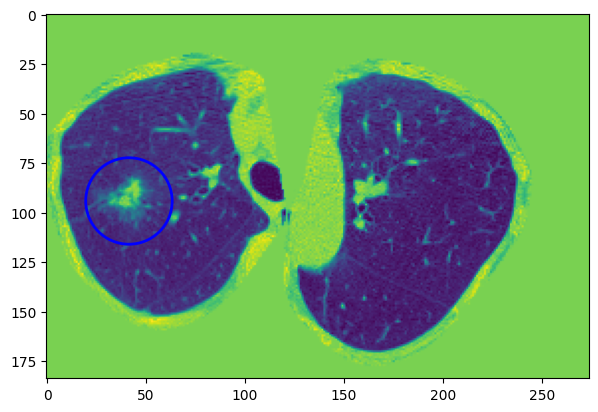

File 1.3.6.1.4.1.14519.5.2.1.6279.6001.801945620899034889998809817499_clean.npy already exists
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.801945620899034889998809817499_label.npy already exists


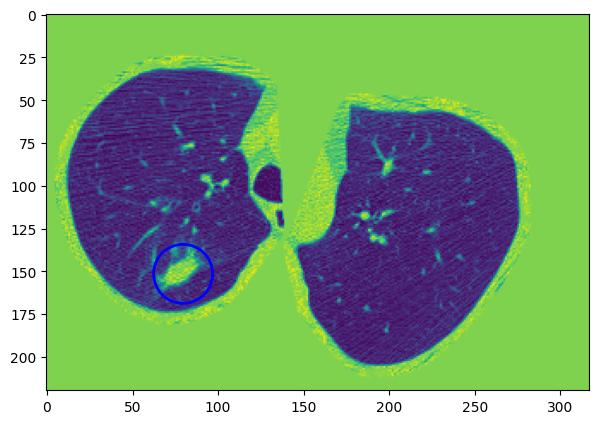

File 1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689_clean.npy already exists
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689_label.npy already exists


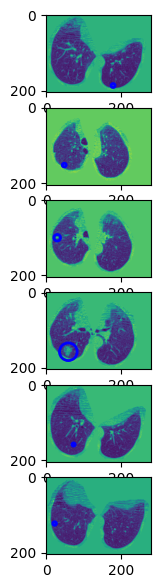

File 1.3.6.1.4.1.14519.5.2.1.6279.6001.170825539570536865106681134236_clean.npy already exists
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.170825539570536865106681134236_label.npy already exists
No nodules found in scan 1.3.6.1.4.1.14519.5.2.1.6279.6001.170825539570536865106681134236
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.172845185165807139298420209778_clean.npy already exists
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.172845185165807139298420209778_label.npy already exists
No nodules found in scan 1.3.6.1.4.1.14519.5.2.1.6279.6001.172845185165807139298420209778
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.127965161564033605177803085629_clean.npy already exists
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.127965161564033605177803085629_label.npy already exists


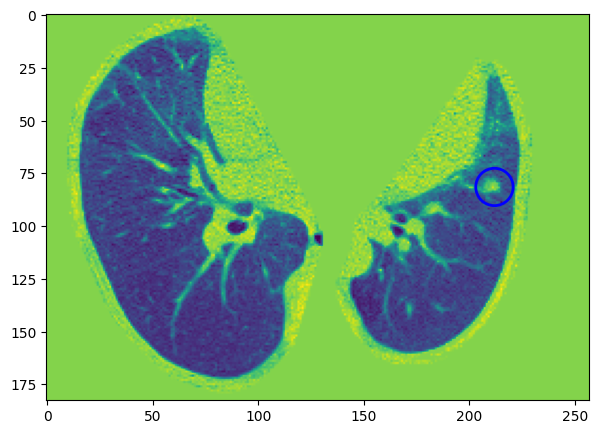

File 1.3.6.1.4.1.14519.5.2.1.6279.6001.144883090372691745980459537053_clean.npy already exists
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.144883090372691745980459537053_label.npy already exists


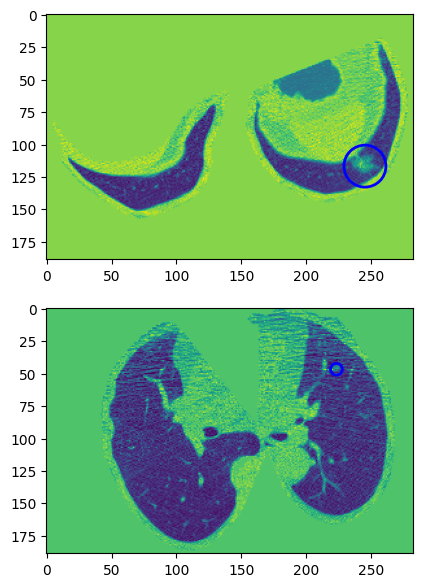

File 1.3.6.1.4.1.14519.5.2.1.6279.6001.177252583002664900748714851615_clean.npy already exists
File 1.3.6.1.4.1.14519.5.2.1.6279.6001.177252583002664900748714851615_label.npy already exists


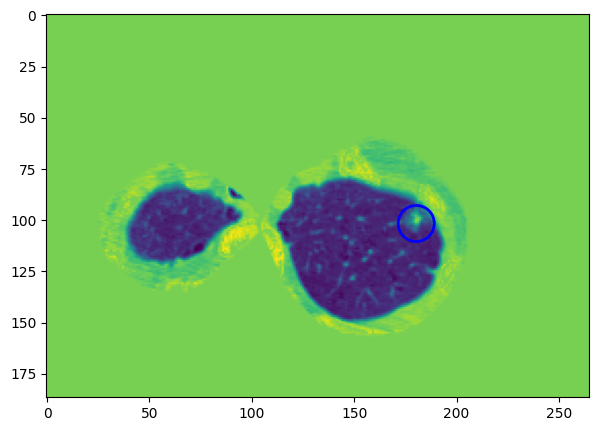

In [55]:
# investigate the LPI scans
luna_dicom_metadata = pd.read_csv('/home/jmccabe/Projects/SOTAEvaluationNoduleDetection/data/LUNA/metadata/dicom_metadata.csv')
lpi = luna_dicom_metadata.AnatomicalOrientation=='LPI'

scan_ids = [mhd.replace('.mhd','') for mhd in luna_dicom_metadata[lpi].scan_id.unique()]
for scan_id in scan_ids:

    image = load_processed_image(scan_id, PREP_RESULT_PATH, CLUSTER_PATH)
    label = load_processed_label(scan_id, PREP_RESULT_PATH, CLUSTER_PATH)

    if np.equal(label, 0).sum() != 4:
        display_nodules(image, label)
    else:
        print(f'No nodules found in scan {scan_id}')

In [15]:
img = np.load('/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master/prep_result/dicom/summit-2264-sze_Y0_BASELINE_A_clean.npy')
label = np.load('/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master/prep_result/dicom/summit-2264-sze_Y0_BASELINE_A_label.npy')
pbb = np.load('/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master/bbox_result/summit-2264-sze_Y0_BASELINE_A_pbb.npy')

In [16]:
pbb = pbb[pbb[:,0]>-1]

In [17]:
pbb = nms(pbb,0.05)
np.savetxt('/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master/bbox_result/summit-2264-sze_Y0_BASELINE_A_pbb.csv',pbb, delimiter=",")

np.savetxt('/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master/bbox_result/summit-2264-sze_Y0_BASELINE_A_label.csv',label, delimiter=",")


In [6]:
pbb[0].astype('int')[1:]

array([ 98, 178, 257,   7])

In [13]:
img.shape

(1, 262, 236, 313)

[ 98 178 257   7]


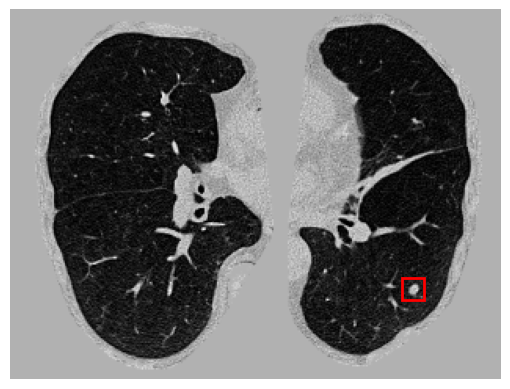

[ 58  70 109  28]


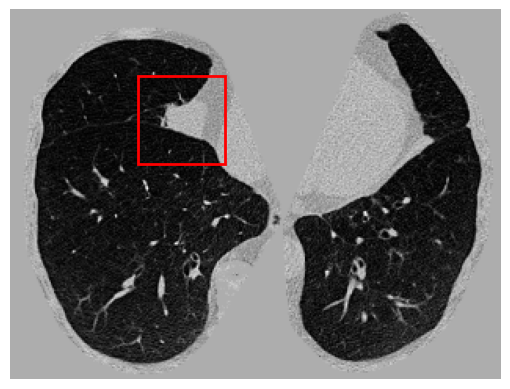

[149 101 273   7]


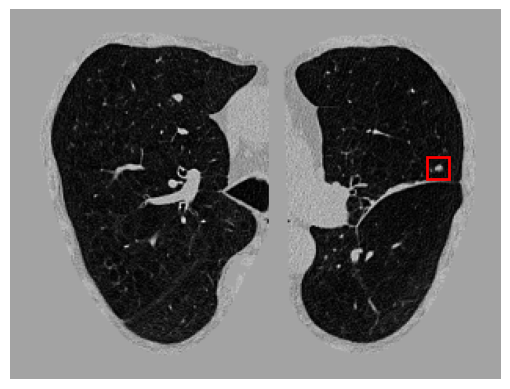

[161 121 217   8]


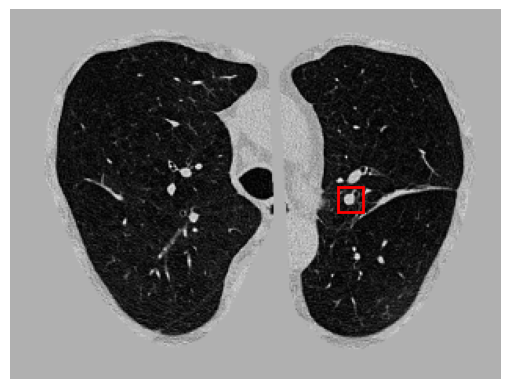

[157  73 108   8]


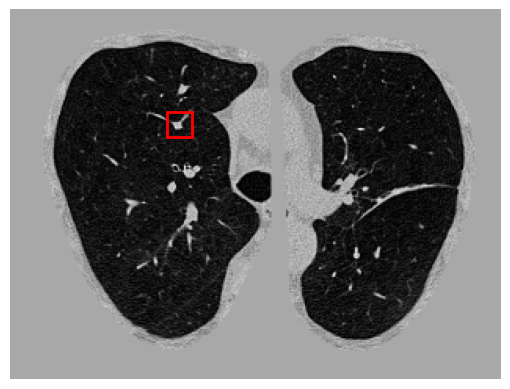

In [7]:

for idx in range(pbb.shape[0]):


    box = pbb[idx].astype('int')[1:]
    print(box)
    ax = plt.subplot(1,1,1)
    plt.imshow(img[0,box[0]],'gray')
    plt.axis('off')
    rect = patches.Rectangle((box[2]-box[3],box[1]-box[3]),box[3]*2,box[3]*2,linewidth=2,edgecolor='red',facecolor='none')
    ax.add_patch(rect)
    plt.show()
